In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15494, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 15494 (delta 0), reused 3 (delta 0), pack-reused 15490
Receiving objects: 100% (15494/15494), 14.11 MiB | 23.64 MiB/s, done.
Resolving deltas: 100% (10408/10408), done.


In [ ]:
%cd /content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content
!ln -s "/content/drive/MyDrive/yolo" /googledrive
!cp /googledrive/maskyolov3_colab.zip /content

/content


In [ ]:
!unzip maskyolov3_colab.zip

Archive:  maskyolov3_colab.zip
   creating: maskyolov3_colab/
   creating: maskyolov3_colab/cfg/
  inflating: maskyolov3_colab/cfg/obj.data  
 extracting: maskyolov3_colab/cfg/obj.names  
  inflating: maskyolov3_colab/cfg/train.txt  
  inflating: maskyolov3_colab/cfg/valid.txt  
   creating: maskyolov3_colab/cfg/weights/
  inflating: maskyolov3_colab/cfg/yolov3-obj.cfg  
  inflating: maskyolov3_colab/cfg/yolov3-tiny-obj.cfg  
  inflating: maskyolov3_colab/darknet53.conv.74  
   creating: maskyolov3_colab/yolodata/
 extracting: maskyolov3_colab/yolodata/maksssksksss0.png  
  inflating: maskyolov3_colab/yolodata/maksssksksss0.txt  
 extracting: maskyolov3_colab/yolodata/maksssksksss1.png  
  inflating: maskyolov3_colab/yolodata/maksssksksss1.txt  
 extracting: maskyolov3_colab/yolodata/maksssksksss10.png  
  inflating: maskyolov3_colab/yolodata/maksssksksss10.txt  
 extracting: maskyolov3_colab/yolodata/maksssksksss100.png  
  inflating: maskyolov3_colab/yolodata/maksssksksss100.txt  
 e

In [ ]:
#強制中斷 ctrl + M + I

%cd maskyolov3_colab/
!/content/darknet/darknet detector train cfg/obj.data cfg/yolov3-tiny-obj.cfg darknet53.conv.74 -dont_show

串流輸出內容已截斷至最後 5000 行。
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.561018), count: 2, class_loss = 91.144241, iou_loss = 0.430466, total_loss = 91.574707 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.480926), count: 16, class_loss = 366.185242, iou_loss = 3.758850, total_loss = 369.944092 
 total_bbox = 3255, rewritten_bbox = 0.337942 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.675908), count: 4, class_loss = 91.455727, iou_loss = 0.486206, total_loss = 91.941933 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.456285), count: 6, class_loss = 364.311157, iou_loss = 1.218567, total_loss = 365.529724 
 total_bbox = 3265, rewritten_bbox = 0.336907 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.787819), count: 2, class_loss = 91.145096, iou_loss = 0.067970, total_loss = 91.213066 
v3 (mse loss, Normalizer: 

In [ ]:
!ln -s "/content/drive/MyDrive/yolo" /googledrive
!cp /googledrive/yolov3-tiny-obj_30000.weights /content/maskyolov3_colab

ln: failed to create symbolic link '/googledrive/yolo': File exists


In [ ]:
!/content/darknet/darknet detector train cfg/obj.data cfg/yolov3-tiny-obj.cfg yolov3-tiny-obj_30000.weights -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
yolov3-tiny-obj
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 -> 

In [ ]:
!/content/darknet/darknet detector test cfg/obj.data cfg/yolov3-tiny-obj.cfg yolov3-tiny-obj_30000.weights ../test01.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/5

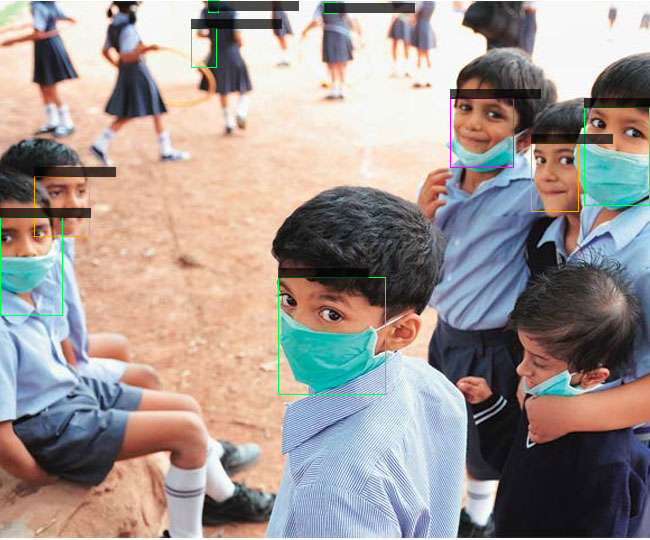

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("predictions.jpg")
cv2_imshow(img)